<a href="https://colab.research.google.com/github/SarmenSinanian/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/Sarmen_Sinanian_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [2]:
sales = [3505, 2400,3027,2798,3700,3250,2689]


def MVSD(some_list):
  total = 0
  x_count = 0
  sum_squares = 0
  for x in some_list:
    total+=x
    x_count+=1

  mean = total/x_count

  for x in some_list:
    sum_squares += (x-mean)**2
  
  variance = sum_squares/x_count

  std_dev = variance**.5

  print(f'Sum total = {total}')
  print(f'N = {x_count}')
  print(f'Mean = {mean}')
  print(f'Variance = {variance}')
  print(f'Standard deviation = {std_dev}')
  return total,x_count,mean,variance,std_dev

MVSD(sales)

Sum total = 21369
N = 7
Mean = 3052.714285714286
Variance = 183761.06122448976
Standard deviation = 428.67360686714756


(21369, 7, 3052.714285714286, 183761.06122448976, 428.67360686714756)

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

#IS THE COVARIANCE BETWEEN LAST WEEK'S SALES NUMBERS AND LAST WEEK'S CUSTOMER COUNT: 7604???

In [3]:
customers = [127, 80, 105, 92, 120, 115, 93] 
sc_cov = [sales,customers]
np.cov(sc_cov)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [4]:
MVSD(customers)
MVSD(sales)

Sum total = 732
N = 7
Mean = 104.57142857142857
Variance = 249.3877551020408
Standard deviation = 15.792015549069118
Sum total = 21369
N = 7
Mean = 3052.714285714286
Variance = 183761.06122448976
Standard deviation = 428.67360686714756


(21369, 7, 3052.714285714286, 183761.06122448976, 428.67360686714756)

In [5]:
combo_list = [sales,customers]

sc_cov_lists = [sales,customers]
sc_cov = np.cov(sc_cov_lists)

std_dev1 = 15.792015549069118
std_dev2 = 428.67360686714756

std_cov = sc_cov/(std_dev1*std_dev2)

std_cov

array([[31.66911826,  1.12330631],
       [ 1.12330631,  0.04297913]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [6]:

titanic_url = ('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df = pd.read_csv(titanic_url)
print(df.shape)
df.head()

(1310, 16)


,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
# df['fare'] = (df['fare']).astype(int)

In [0]:
df_filtered = df.filter(['pclas','survived','age','sibsp','parch','fare','has_cabin_number'])


In [9]:
df_filtered.dtypes


survived            float64
age                 float64
sibsp               float64
parch               float64
fare                float64
has_cabin_number      int64
dtype: object

#IS THE BELOW MATRIX SUFFICIENT?

In [10]:
df_cov = np.cov(df_filtered)
df_cov

array([[7143.72565104, 5139.35360463, 5144.76385417, ...,  185.51598958,
         203.18338542,           nan],
       [5139.35360463, 3768.52318082, 3768.0845605 , ...,   44.29666975,
          50.45529125,           nan],
       [5144.76385417, 3768.0845605 , 3768.08041667, ...,   50.05145833,
          56.63604167,           nan],
       ...,
       [ 185.51598958,   44.29666975,   50.05145833, ...,  117.19510417,
         125.91114583,           nan],
       [ 203.18338542,   50.45529125,   56.63604167, ...,  125.91114583,
         135.27760417,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan]])

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

(-1, 10)

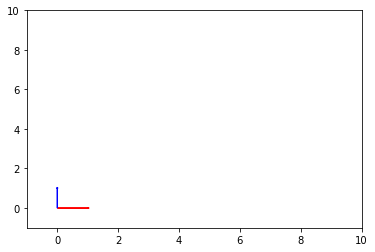

In [11]:
a = [1,0]
b = [0,1]

plt.arrow(0,0,a[0],a[1], head_width=.05,head_length=.05,color='red')
plt.arrow(0,0,b[0],b[1], head_width=.05,head_length=.05,color='blue')
plt.xlim(-1,10)          
plt.ylim(-1,10)

In [0]:
#SYNONYM = RIGHT ANGLULAR/PERPENDICULAR

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [13]:
a=[-5,3,7]
b=[6,-8,2]

def vectordot(v1, v2):
  answer = 0
  for x in range(len(v1)):
    product = v1[x]*v2[x]
    answer += product
    print(f'V1[{x}]*V2[{x}]answer: {product}')
  print(f'V1 dot V2 = {answer}')
  return answer


if vectordot(a,b) != 0:
  print(f'{a} and {b} are NOT orthogonal')
else:
  print(f'{a} and {b} ARE orthogonal')

V1[0]*V2[0]answer: -30
V1[1]*V2[1]answer: -24
V1[2]*V2[2]answer: 14
V1 dot V2 = -40
[-5, 3, 7] and [6, -8, 2] are NOT orthogonal


In [14]:
np.dot(a,b)

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [15]:
c=[2,-15,6,20]

def magnitude(v):
  raw = 0
  for x in range(len(v)):
    raw += v[x]**2
  mag = raw**.5
  return mag

print(magnitude(c)**2)

np.linalg.norm(c)**2

665.0


665.0

In [16]:
print(vectordot(c,c))
print(np.dot(c,c))

V1[0]*V2[0]answer: 4
V1[1]*V2[1]answer: 225
V1[2]*V2[2]answer: 36
V1[3]*V2[3]answer: 400
V1 dot V2 = 665
665
665


In [17]:
c = np.array([2,-15,6,20])
# ct = c.T

ct = np.transpose(c)
np.dot(ct,c)

665

The square of the norm of a vector is equivalent to the dot product of a vector with itself. 

The dot product of a vector and itself can be rewritten as that vector times the transpose of itself. 

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

#IS THIS WHAT IS MEANT?

In [0]:
# F=4i+12j+11k+9l+2m

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

Text(0.5, 0, 'Z')

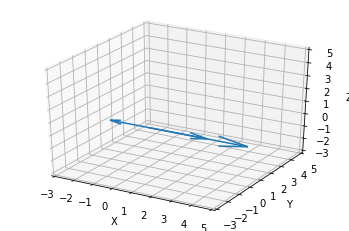

In [19]:
# from mpl_toolkits.mplot3d import Axes3D
lin_dep1 = [3,0,0]
lin_dep2 = [-2,0,0]
lin_dep3 = [5,0,0]

vectors = np.array([[0,0,0,3,0,0],
                   [0,0,0,-2,0,0],
                   [0,0,0,5,0,0]])

X,Y,Z,U,V,W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.quiver(X,Y,Z,U,V,W,length=1)
ax.set_xlim([-3,5])
ax.set_ylim([-3,5])
ax.set_zlim([-3,5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

Text(0.5, 0, 'Z')

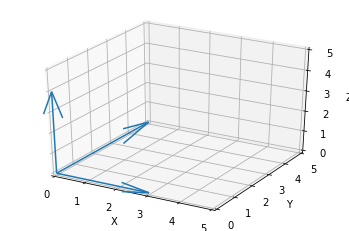

In [20]:
lin_ind1 = [3,0,0]
lin_ind2 = [0,5,0]
lin_ind3 = [0,0,4]

vectors = np.array([[0,0,0,3,0,0],
                   [0,0,0,0,5,0],
                   [0,0,0,0,0,4]])

X,Y,Z,U,V,W = zip(*vectors)
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.quiver(X,Y,Z,U,V,W,length=1)
ax.set_xlim([0,5])
ax.set_ylim([0,5])
ax.set_zlim([0,5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
#R2

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
#R3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



(0, 3)

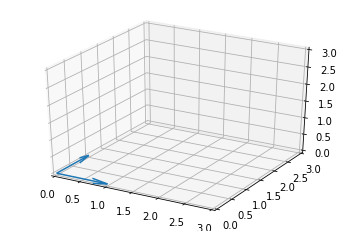

In [23]:
#BELOW IS AN ORTHONORMAL BASIS

basis_one = [1,0]
basis_two = [0,1]

vectors = np.array([[0,0,0,1,0,0],
            [0,0,0,0,1,0],
            [0,0,0,0,0,0]])

X,Y,Z,U,V,W =zip(*vectors)
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.quiver(X,Y,Z,U,V,W,length=1)
ax.set_xlim([0,3])
ax.set_ylim([0,3])
ax.set_zlim([0,3])

## 6.2 What does it mean to form a basis?

#IT MEANS TO CREATE A VECTOR SPACE WITH LINEARLY INDEPENDENT VECTORS.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

#RANK 3 (3 LIN-IND COLUMNS)

## 7.2 What does the rank of a matrix tell us?

#IT TELLS US ITS SPAN

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

#ANY CHANCE THE BELOW IS ACCURATE? THE PROJECTION OF W(RED) ONTO V(GREEN) IS SHORTER THAN THE TOTAL LENGTH OF THE VECTOR THAT IS BEING PROJECTED ON. ANY ISSUES WITH THIS?

In [24]:

v = [1,3]
w = [-1,2]

wvdot = np.dot(v,w)
vvdot = np.dot(v,v)
wv_over_vv = wvdot/vvdot

proj_l_of_w = np.multiply(wv_over_vv,v)

proj_l_of_w

array([0.5, 1.5])

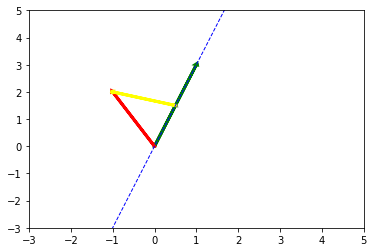

In [25]:
#Axis Bounds
plt.xlim(-3,5)
plt.ylim(-3,5)

#Original Vector
v = [1,3]
w = [-1,2]
proj_l_of_w = np.multiply(wv_over_vv,v)
x_minus_proj = w-proj_l_of_w

#Get Values for L
axes = plt.gca()
x_values = np.array(axes.get_xlim())
y_values = 3*x_values

#Plot Vectors and L
plt.plot(x_values, y_values, '--', color = 'b', linewidth = 1)
plt.arrow(0,0,proj_l_of_w[0],proj_l_of_w[1],linewidth=3,head_width=.05,head_length=.05,color='gray')
plt.arrow(0,0,v[0],v[1], linewidth=3, head_width=.05,head_length=.05,color='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(proj_l_of_w[0], proj_l_of_w[1], x_minus_proj[0], x_minus_proj[1], linewidth=3, head_width=.05, head_length=0.05, color = 'yellow')

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

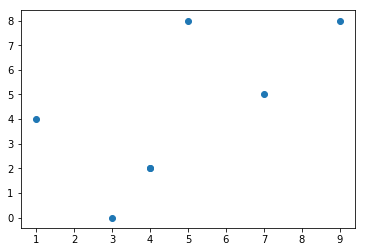

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()